In [2]:
import pandas as pd
path = 'E:/BD_Class/file'
df_raw = pd.read_csv(f'{path}/유치원db_raw.csv',encoding='euc-kr')
df_raw = df_raw.iloc[:,1:]

In [3]:
df_raw

,sido,sigungu,name,ty_pe,ops,post,adr,phone,fax,rooms,...,lng,lon,bus,web,s_d,brk_s_d,brk_e_d,e_d,ops_day,dong
0,서울특별시,종로구,이화어린이집,민간,정상,3123,서울특별시 종로구 율곡로20길 3 (충신동),02-747-2686,2,6,...,37.489,127.038,운영,NaN,2004-05-03,NaN,NaN,NaN,2016-09-30,충신동
1,서울특별시,종로구,삼청어린이집,국공립,정상,3049,서울특별시 종로구 삼청로7길 26 (팔판동),02-723-0155,2,3,...,37.584,126.980,미운영,http://cafe.naver.com/samchung1004,1999-09-01,NaN,NaN,NaN,2016-09-30,삼청동
2,서울특별시,종로구,창신어린이집,사회복지법인,정상,3105,서울특별시 종로구 창신5길 22 (창신동),02-743-6302,2,4,...,37.574,127.012,운영,http://changsin.ukid.kr,1978-12-01,NaN,NaN,NaN,2016-09-30,창신1동
3,서울특별시,종로구,아동회관어린이집,국공립,정상,3094,서울특별시 종로구 지봉로13길 14 아동회관어린이집,02-763-6038,50,6,...,37.578,127.012,미운영,NaN,1988-10-01,NaN,NaN,NaN,2016-09-30,창신동
4,서울특별시,종로구,부암어린이집,국공립,정상,3019,서울특별시 종로구 세검정로6다길 10-7,02-396-6226,2,5,...,37.602,126.963,운영,www.buarm.co.kr,1998-07-29,NaN,NaN,NaN,2016-09-30,신영동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281353,서울특별시,강동구,구립아르테온보나어린이집,국공립,정상,5274,서울특별시 강동구 고덕로 360 고덕아르테온 339동 인근 관리동,02-442-2022,0,4,...,37.566,126.978,미운영,NaN,2020-02-20,NaN,NaN,NaN,2020-08-31,명동
281354,서울특별시,강동구,구립아르테온보예어린이집,국공립,정상,5274,서울특별시 강동구 고덕로 360 고덕아르테온아파트 319동 1층(상일동),02-6925-5642,2,6,...,37.555,127.168,미운영,NaN,2020-02-20,NaN,NaN,NaN,2020-08-31,명동
281355,서울특별시,강동구,이삭숲어린이집,민간,정상,5219,서울특별시 강동구 동남로82길 29-8 이삭숲어린이집,02-441-2914,2,6,...,37.561,127.159,운영,NaN,2020-05-06,NaN,NaN,NaN,2020-08-31,명동
281356,서울특별시,강동구,구립에코포레어린이집,국공립,정상,5300,서울특별시 강동구 천중로 253 이편한세상강동에코포레아파트 관리동 1층,02-470-0633,0,3,...,37.566,126.978,NaN,NaN,2020-06-01,NaN,NaN,NaN,2020-08-31,명동


In [16]:
## 국공립만 추려서 보고 싶을 때
# df_np = df_raw[df_raw.ty_pe =='국공립']
# df_raw = df_np

In [8]:
df_gu = df_raw[['sigungu','no_capa','no_enroll']].groupby([df_raw['sigungu'],df_raw['ops_day']]).sum()
df_gu['cap_ratio'] = df_gu['no_enroll']/df_gu['no_capa']
df_gu

no_capa  no_enroll  cap_ratio
sigungu ops_day                                  
강남구     2016-09-30    11684      10057   0.860750
        2016-10-31    11775      10155   0.862420
        2016-11-30    11794      10191   0.864083
        2016-12-31    11794      10219   0.866458
        2017-01-31    11775      10124   0.859788
...                     ...        ...        ...
중랑구     2020-04-30    10312       8126   0.788014
        2020-05-31    10274       8197   0.797839
        2020-06-30    10317       8201   0.794902
        2020-07-31    10388       8264   0.795533
        2020-08-31    10369       8267   0.797280

[1200 rows x 3 columns]

In [10]:
df_gu2 = df_gu.unstack(level=-2,fill_value=None)
df_gu2

no_capa                                                       \
sigungu        강남구    강동구   강북구    강서구    관악구   광진구    구로구   금천구    노원구   
ops_day                                                                   
2016-09-30   11684  12781  8686  17134  11731  8959  13818  8217  14105   
2016-10-31   11775  12781  8666  17126  11731  9078  13817  8201  14097   
2016-11-30   11794  12830  8735  17363  11673  9078  13890  8207  14097   
2016-12-31   11794  12906  8769  17363  11772  9078  13905  8213  14137   
2017-01-31   11775  12921  8758  17351  12047  9059  13899  8229  14137   
2017-02-28   11775  13078  8716  17352  12104  9059  13899  8275  14118   
2017-03-31   11622  13017  8602  17187  11832  8978  13798  8215  14079   
2017-04-30   11586  12859  8538  17167  11832  8978  13666  8191  14043   
2017-05-31   11568  12859  8538  17227  11832  8978  13647  8237  14016   
2017-06-30   11567  12879  8538  17262  11768  8932  13647  8255  13956   
2017-07-31   11547  12949  8538  17261  11768  8981  13628  8235  13943   
2017-08-31   11514  12949  8538  17275  11768  8981  13623  8211  13854   
2017-09-30   11487  12941  8492  17295  11768  8981  13610  8211  13906   
2017-10-31   11554  12912  8492  17295  11768  8981  13612  8211  13905   
2017-11-30   11548  12899  8493  17295  11767  8981  13627  8211  13905   
2017-12-31   11545  12930  8496  17450  11767  8965  13614  8230  13898   
2018-01-31   11631  12977  8533  17450  11806  8946  13673  8177  13898   
2018-02-28   11680  12915  8529  17467  11901  8964  13663  8177  13885   
2018-03-31   11633  12814  8458  17489  11706  8644  13333  8146  13579   
2018-04-30   11595  12835  8265  17468  11642  8557  13335  8063  13538   
2018-05-31   11556  12800  8265  17468  11592  8521  13335  8063  13510   
2018-06-30   11556  12800  8265  17468  11476  8389  13249  7982  13451   
2018-07-31   11556  12865  8248  17468  11476  8487  13249  7909  13448   
2018-08-31   11545  12780  8248  17505  11476  8543  13246  7909  13416   
2018-09-30   11535  12756  8250  17505  11456  8498  13230  7909  13377   
2018-10-31   11535  12749  8250  17506  11456  8461  13185  7909  13351   
2018-11-30   11527  12756  8223  17531  11456  8461  13185  7909  13335   
2018-12-31   11508  12739  8223  17629  11505  8478  13275  7859  13237   
2019-01-31   11553  12719  8220  17606  11465  8459  13294  8015  13237   
2019-02-28   11435  12724  8182  17495  11464  8459  13275  7995  13237   
2019-03-31   11298  12091  8093  17296  11111  8311  13095  7765  12621   
2019-04-30   11287  12033  7999  17232  11012  8288  13006  7715  12547   
2019-05-31   11198  12049  7999  17174  10928  8250  13095  7715  12493   
2019-06-30   11121  12048  7963  17096  10899  8230  13095  7702  12382   
2019-07-31   10888  12099  7921  17069  11053  8229  13056  7673  12345   
2019-08-31   10817  12095  7863  17065  11053  8229  13054  7663  12279   
2019-09-30   10802  12000  7863  17010  11053  8229  13054  7663  12279   
2019-10-31   10870  12201  7720  17040  11053  8175  13014  7725  12245   
2019-11-30   10851  12222  7720  17040  11028  8175  13014  7691  12186   
2019-12-31   10847  12238  7715  16902  11028  8161  12982  7753  12302   
2020-01-31   10794  12469  7715  16901  10847  8161  13012  7654  12302   
2020-02-29   10794  12417  7740  16955  10817  8201  13083  7647  12283   
2020-03-31   10805  12366  7623  16343  10531  7908  12677  7647  11739   
2020-04-30   10758  12340  7619  15999  10491  7812  12449  7620  11704   
2020-05-31   10739  12406  7619  15964  10352  7710  12395  7600  11684   
2020-06-30   10637  12423  7603  15925  10277  7710  12421  7580  11684   
2020-07-31   10671  12396  7583  15829  10277  7661  12541  7546  11651   
2020-08-31   10651  12303  7583  15751  10287  7651  12578  7551  11632   

                   ... cap_ratio                                          \
sigungu       도봉구  ...       성동구       성북구       송파구       양천구      영등포구   
ops_day            ...           

In [13]:
df_gu2.to_csv(f'{path}/유치원db_pivot.csv',encoding='euc-kr')

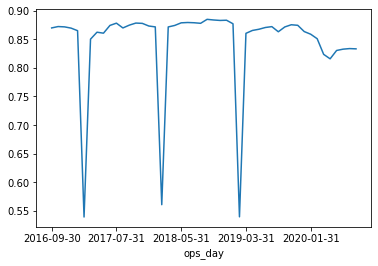

In [14]:
df_gu2['cap_ratio','마포구'].plot()